## Project Recipe Reviews

# Importation du dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import re

from numpy.random import randint
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,r2_score, mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from wordcloud import WordCloud
from collections import Counter


In [3]:
# Charger le fichier CSV dans un DataFrame
df = pd.read_csv('Recipe Reviews and User Feedback Dataset.csv')
df = pd.DataFrame(df)
# Affiche les 5 premières lignes du DataFrame
df.head(5)

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


# Mise en Forme du dataset

In [4]:
#nettoyer la dataset
missing_values = df.isnull().sum()
print(missing_values)

Unnamed: 0         0
recipe_number      0
recipe_code        0
recipe_name        0
comment_id         0
user_id            0
user_name          0
user_reputation    0
created_at         0
reply_count        0
thumbs_up          0
thumbs_down        0
stars              0
best_score         0
text               2
dtype: int64


In [5]:
# Trouver les lignes contenant des valeurs manquantes
rows_with_missing_values = df[df.isnull().any(axis=1)]
rows_with_missing_values

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
1507,344,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_260955,u_1oKZmfyycO3xVnQeffIKHuaKT2U,No.1FamilyBaker,1,1622717645,0,0,0,5,100,NaN
2722,299,6,21444,Favorite Chicken Potpie,sp_aUSaElGf_21444_c_260817,u_1oKXz42APTrXTFF6SGvR3YMBJGy,TRGriggs,1,1622717652,0,0,0,5,100,NaN


In [6]:
print( {df.duplicated().sum()})
df=df.drop_duplicates()
print( {df.duplicated().sum()})

{0}
{0}


In [7]:
# Remplacer les valeurs manquantes dans la colonne 'text' aux lignes 1507 et 2722 par 'unknown'
df.loc[[1507, 2722], 'text'] = df.loc[[1507, 2722], 'text'].fillna('unknown')
# Vérifier à nouveau s'il y a des valeurs manquantes
missing_values_after_handling = df.isnull().sum()
print(missing_values_after_handling)

# Trouver les lignes contenant des valeurs manquantes
rows_with_missing_values = df[df.isnull().any(axis=1)]
rows_with_missing_values

Unnamed: 0         0
recipe_number      0
recipe_code        0
recipe_name        0
comment_id         0
user_id            0
user_name          0
user_reputation    0
created_at         0
reply_count        0
thumbs_up          0
thumbs_down        0
stars              0
best_score         0
text               0
dtype: int64


,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text


In [8]:
df = df.drop(['user_id', 'comment_id', 'created_at'], axis=1) #dropping redundant columns

Cleaning up non numerical values (except Text)

In [9]:
#find the non numerical values,

# Iterate through columns, excluding 'text'
for column in df.columns:
  if column != 'text':
    # Find non-numerical values in the current column
    non_numerical_values = df[~df[column].apply(lambda x: isinstance(x, (int, float)))]

    if not non_numerical_values.empty:
      print(f"Non-numerical values found in column '{column}':")
      print(non_numerical_values[column].unique())

Non-numerical values found in column 'recipe_name':
['Creamy White Chili' 'Best Ever Banana Bread' 'Cheeseburger Soup'
 'Amish Breakfast Casserole'
 'Pumpkin Spice Cupcakes with Cream Cheese Frosting'
 'Favorite Chicken Potpie' 'Flavorful Chicken Fajitas' 'Apple Pie'
 'Enchilada Casser-Ole!' 'Zucchini Pizza Casserole' 'Traditional Lasagna'
 'Cauliflower Soup' 'Basic Homemade Bread' 'Zucchini Cupcake'
 'Li’l Cheddar Meat Loaves' 'Rustic Italian Tortellini Soup'
 'Fluffy Key Lime Pie' 'Stuffed Pepper Soup' 'Moist Chocolate Cake'
 'Mom’s Meat Loaf' 'Pineapple Orange Cake' 'Baked Spaghetti'
 'Buttery Cornbread' 'Sandy’s Chocolate Cake' 'Baked Mushroom Chicken'
 'Hot Milk Cake' 'Macaroni Coleslaw' 'Cheesy Ham Chowder'
 'Winning Apple Crisp' 'Forgotten Jambalaya' 'Basic Banana Muffins'
 'Seafood Lasagna' 'Creamy Grape Salad' 'Peanut Butter Chocolate Dessert'
 'Flavorful Pot Roast' 'Pumpkin Bread' 'Taco Lasagna'
 'Frosted Banana Bars' 'Shrimp Scampi' 'Rhubarb Custard Bars'
 'Caramel-Pecan Che

# Feature engineering

### Processing the text

In [10]:
import nltk
nltk.download("popular")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from textblob import TextBlob

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [11]:
def preprocess_text(text):
    if pd.isnull(text):  # Handle missing values
        return ""
    # Convert 'text' column to string type
    df['text'] = df['text'].astype(str)
    #replace empty text
    df["text"] = df["text"].fillna("")
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'&#34;', '', text)
    #remove numbers
    text_without_numbers = re.sub(r'\d+', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stop words (including custom words)
    custom_stop_words = set(stopwords.words('english')).union({'used', 'use', 'make', 'made', 'recipe'})
    tokens = [word for word in tokens if word not in custom_stop_words]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)
    #Remove domain-specific noise
    text = re.sub(r'this recipe is', '', text)


df['processed_reviews'] = df['text'].apply(preprocess_text)
print(df[['text', 'processed_reviews']].head())

                                                text  \
0  I tweaked it a little, removed onions because ...   
1  Bush used to have a white chili bean and it ma...   
2  I have a very complicated white chicken chili ...   
3  In your introduction, you mentioned cream chee...   
4  Wonderful! I made this for a &#34;Chili/Stew&#...   

                                   processed_reviews  
0  tweaked little removed onion onion hater house...  
1  bush white chili bean super simple ’ written a...  
2  complicated white chicken chili year everyone ...  
3  introduction mentioned cream cheese none liste...  
4  wonderful 34chilistew34 night dinner church ev...  


Generating a word cloud to identify key words

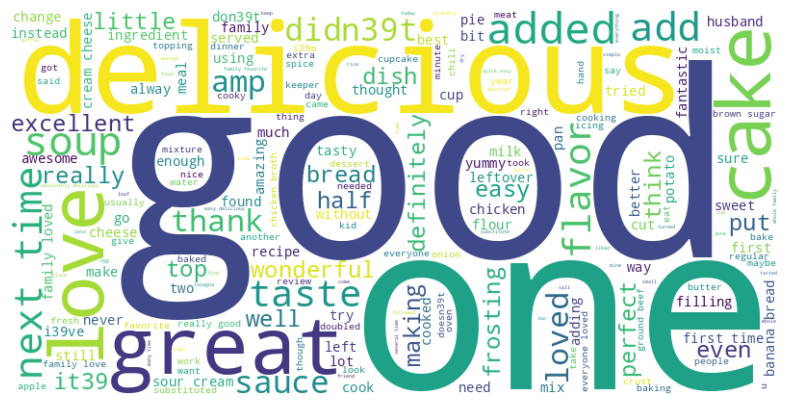

In [12]:
# Generate word cloud
all_words = ' '.join(df['processed_reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Word frequency
word_counts = Counter(all_words.split())
print(word_counts.most_common(10))

### Creating dummy variables to count bad and good words in the text:

In [13]:
# Define lists of "good" and "bad" keywords based on domain knowledge
good_keywords = ["excellent", "perfect", "delicious", "amazing", "great", "love", "favorite", "tasty"]
bad_keywords = ["terrible", "bad", "disappointing", "horrible", "worst", "overcooked", "undercooked", "bland"]

# Function to flag the presence of keywords in text
def flag_keywords(text, keywords):
    text = str(text)
    return sum(1 for word in keywords if word in text.lower())

# Apply the function to the text column
df["good_keyword_count"] = df["text"].apply(lambda x: flag_keywords(x, good_keywords))
df["bad_keyword_count"] = df["text"].apply(lambda x: flag_keywords(x, bad_keywords))

# Create dummy variables for presence of any good or bad keywords
df["has_good_keywords"] = (df["good_keyword_count"] > 0).astype(int)
df["has_bad_keywords"] = (df["bad_keyword_count"] > 0).astype(int)

# Preview the updated DataFrame
print(df[["text", "good_keyword_count", "bad_keyword_count", "has_good_keywords", "has_bad_keywords"]].head())


[('time', 3998), ('good', 3580), ('delicious', 3049), ('great', 2965), ('added', 2795), ('easy', 2789), ('love', 2653), ('one', 2616), ('family', 2479), ('like', 2463)]
                                                text  good_keyword_count  \
0  I tweaked it a little, removed onions because ...                   2   
1  Bush used to have a white chili bean and it ma...                   0   
2  I have a very complicated white chicken chili ...                   1   
3  In your introduction, you mentioned cream chee...                   0   
4  Wonderful! I made this for a &#34;Chili/Stew&#...                   0   

   bad_keyword_count  has_good_keywords  has_bad_keywords  
0                  0                  1                 0  
1                  0                  0                 0  
2                  0                  1                 0  
3                  0                  0                 0  
4                  0                  0                 0  


### Adding sentiment score column

In [14]:
# Add a sentiment polarity column
df['sentiment_score'] = df['processed_reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify reviews based on the score
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['sentiment_score'].apply(classify_sentiment)

#print(df[['text', 'sentiment_score', 'sentiment']].head())
recipe_sentiment_summary = df.groupby('recipe_name').agg(
    total_reviews=('processed_reviews', 'count'),
    avg_sentiment_score=('sentiment_score', 'mean'),
    positive_reviews=('sentiment', lambda x: (x == 'Positive').sum()),
    negative_reviews=('sentiment', lambda x: (x == 'Negative').sum()),
    neutral_reviews=('sentiment', lambda x: (x == 'Neutral').sum())
).reset_index()

print(recipe_sentiment_summary.head())


                 recipe_name  total_reviews  avg_sentiment_score  \
0  Amish Breakfast Casserole            338             0.364839   
1                  Apple Pie            241             0.379935   
2       Asian Chicken Thighs            156             0.282569   
3       Bacon Macaroni Salad             96             0.328666   
4     Baked Mushroom Chicken            152             0.321877   

   positive_reviews  negative_reviews  neutral_reviews  
0               301                15               22  
1               215                 8               18  
2               138                13                5  
3                83                 7                6  
4               129                16                7  


### Calculating a weighed score based on sentiment and stars for the recipes

In [15]:
stars_avg = df.groupby('recipe_name').agg(avg_stars=('stars', 'mean')).reset_index()
reviews_avg = df.groupby('recipe_name').agg( avg_sentiment_score=('sentiment_score', 'mean')).reset_index()
#print (stars_avg, reviews_avg)

#The average sentiment score ranges between -1 and +1, while star ratings are typically on a scale of 1–5. To combine them meaningfully, the sentiment score should be scaled to match the star ratings
df['rescaled_sentiment_score'] = ((df['sentiment_score'] + 1) / 2) * 4 + 1

sentiment_avg = df.groupby('recipe_name').agg(avg_rescaled_sentiment_score=('rescaled_sentiment_score', 'mean')).reset_index()
combined = pd.merge(stars_avg, sentiment_avg, on='recipe_name')

#we weigh the star score more heavily, as it is a fact wheras the sentiment score could be biased or less accurate.
combined['weighted_grade'] = 0.6 * combined['avg_stars'] + 0.4 * combined['avg_rescaled_sentiment_score']

print(combined.head())

                 recipe_name  avg_stars  avg_rescaled_sentiment_score  \
0  Amish Breakfast Casserole   4.526627                      3.729679   
1                  Apple Pie   4.082988                      3.759869   
2       Asian Chicken Thighs   4.525641                      3.565137   
3       Bacon Macaroni Salad   4.291667                      3.657331   
4     Baked Mushroom Chicken   4.453947                      3.643754   

   weighted_grade  
0        4.207848  
1        3.953740  
2        4.141440  
3        4.037933  
4        4.129870  


In [16]:
print(df.columns)

Index(['Unnamed: 0', 'recipe_number', 'recipe_code', 'recipe_name',
       'user_name', 'user_reputation', 'reply_count', 'thumbs_up',
       'thumbs_down', 'stars', 'best_score', 'text', 'processed_reviews',
       'good_keyword_count', 'bad_keyword_count', 'has_good_keywords',
       'has_bad_keywords', 'sentiment_score', 'sentiment',
       'rescaled_sentiment_score'],
      dtype='object')


# Descriptive Analysis of the dataset

## Univariate Statistics

In [18]:
#Most frequent recipe
df['recipe_name'].value_counts()

,count
recipe_name,
Cheeseburger Soup,725
Creamy White Chili,654
Best Ever Banana Bread,509
Enchilada Casser-Ole!,421
Basic Homemade Bread,397
...,...
Peanut Butter Cup Cheesecake,96
Blueberry French Toast,90
Caramel Heavenlies,86


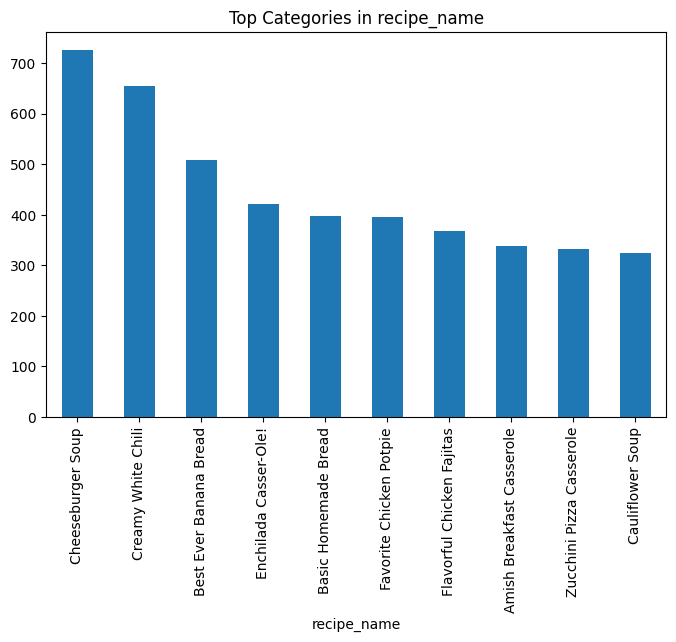

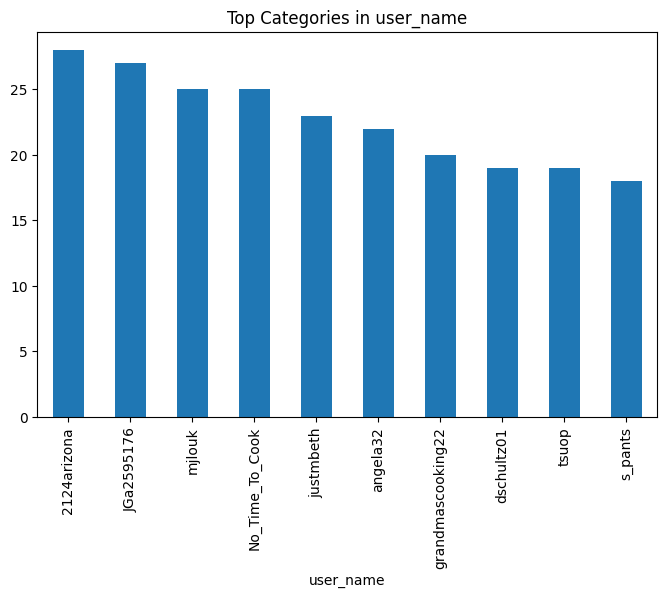

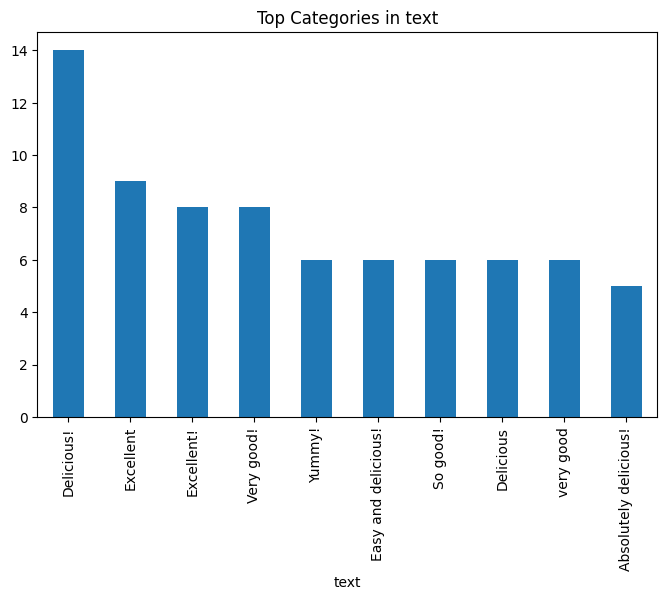

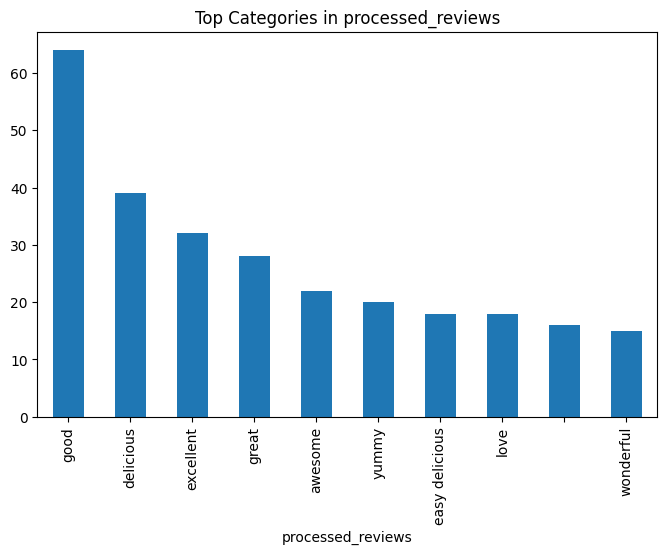

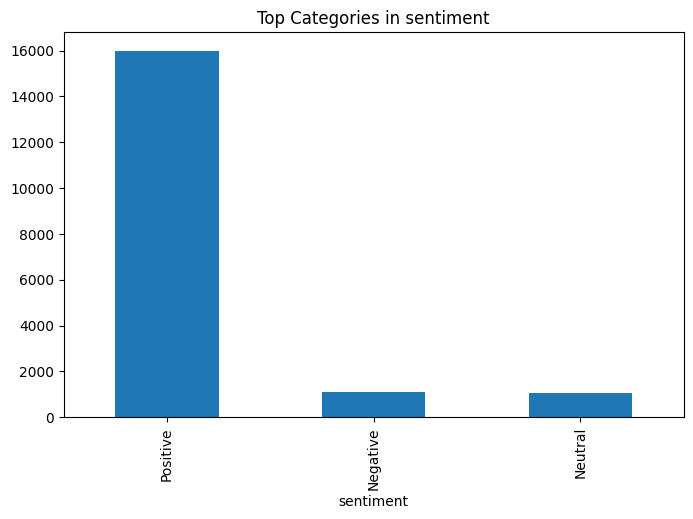

In [19]:
for column in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(8, 5))
    df[column].value_counts().head(10).plot(kind='bar')
    plt.title(f'Top Categories in {column}')
    plt.show()

<ipython-input-20-00dcec883ce6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stars', data=df, palette="mako")


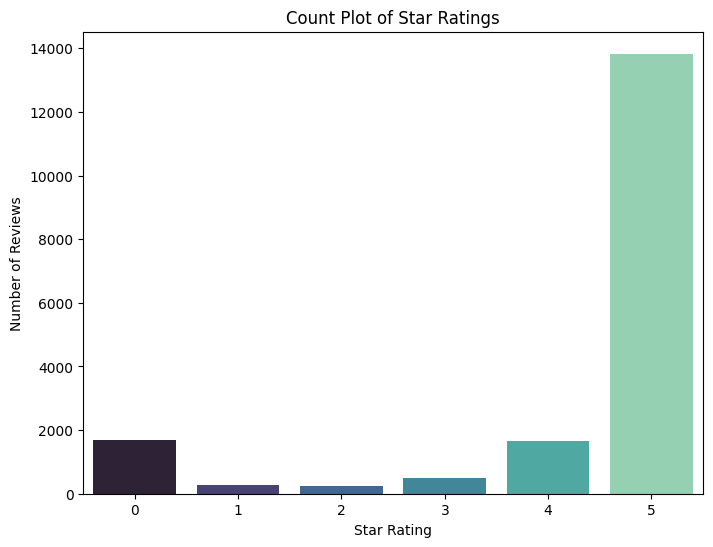

In [20]:

plt.figure(figsize=(8, 6))
sns.countplot(x='stars', data=df, palette="mako")
plt.title('Count Plot of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.show()

Most recipes are well rated, with 5 stars out of 5. Those with a rating of 0 are the recipes that haven’t received any . It will be interesting to study the recipes with low stars (1-3).


In [21]:
# Count the number of users with a star rating of 0
zero_star_count = len(df[df['stars'] == 0])

# Display the result
print(f"Number of users who didn't vote (star rating of 0): {zero_star_count}")

Number of users who didn't vote (star rating of 0): 1696


Top 5 Comments with the Most Thumbs Up:

1. Username: C, Recipe: Skillet Shepherd’s Pie
   Comment: Good,easy recipe. For all u snarky bullies who feel the need to comment that it&#39;s not &#34;technically&#34; Shepherd&#39;s Pie - please get over yourselves. Many recipes that refer to themselves as &#34;spaghetti sauce&#34; or &#34;enchiladas&#34; are not necessarily authentic, but rather americanized versions of delicious dishes. Smh
   Thumbs Up: 106, Thumbs Down: 3

2. Username: Murray111, Recipe: Contest-Winning New England Clam Chowder
   Comment: Fat Free Half and Half is not Half and Half. It is skim milk and a lot of sugar. Heavy Cream or real full fat half and half are far better than the chemical  storm known as fat free half and half. It actually should not be legally called half and half its skim milk and sugar. Devoid of flavor and substance filled with nasty chemicals and sugar. Why do we have an obesity problem in this country because of misnomers like this.  dictionar

<ipython-input-22-d3298072886a>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_thumbs_up['comment_number'], y=most_thumbs_up['thumbs_up'], palette="viridis")


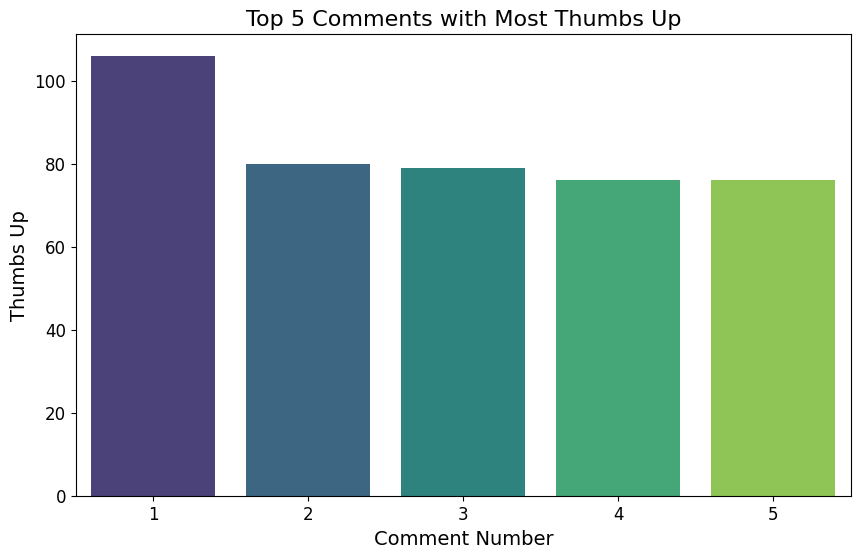

<ipython-input-22-d3298072886a>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_thumbs_down['comment_number'], y=most_thumbs_down['thumbs_down'], palette="viridis")


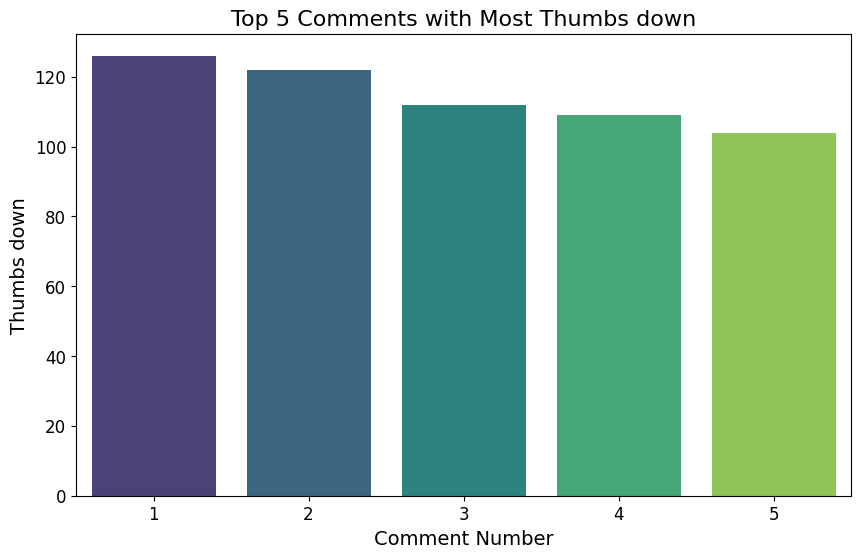

In [22]:
# Sort and select top 5 comments
most_thumbs_up = df.sort_values(by='thumbs_up', ascending=False).head(5)
most_thumbs_down = df.sort_values(by='thumbs_down', ascending=False).head(5)

# Display top comments with the most thumbs up
print("Top 5 Comments with the Most Thumbs Up:\n")
for i, comment in enumerate(most_thumbs_up[['text', 'recipe_name', 'user_name', 'thumbs_up', 'thumbs_down']].itertuples(), start=1):
    print(f"{i}. Username: {comment.user_name}, Recipe: {comment.recipe_name}")
    print(f"   Comment: {comment.text}")
    print(f"   Thumbs Up: {comment.thumbs_up}, Thumbs Down: {comment.thumbs_down}\n")

# Display top comments with the most thumbs down
print("Top 5 Comments with the Most Thumbs Down:\n")
for i, comment in enumerate(most_thumbs_down[['text', 'recipe_name', 'user_name', 'thumbs_up', 'thumbs_down']].itertuples(), start=1):
    print(f"{i}. Username: {comment.user_name}, Recipe: {comment.recipe_name}")
    print(f"   Comment: {comment.text}")
    print(f"   Thumbs Up: {comment.thumbs_up}, Thumbs Down: {comment.thumbs_down}\n")

# Add numeric labels for the comments
most_thumbs_up['comment_number'] = range(1, len(most_thumbs_up) + 1)
most_thumbs_down['comment_number'] = range(1, len(most_thumbs_down) + 1)

# Plotting the top 5 comments with the most thumbs up
plt.figure(figsize=(10, 6))
sns.barplot(x=most_thumbs_up['comment_number'], y=most_thumbs_up['thumbs_up'], palette="viridis")
plt.title("Top 5 Comments with Most Thumbs Up", fontsize=16)
plt.ylabel("Thumbs Up", fontsize=14)
plt.xlabel("Comment Number", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plotting the top 5 comments with the most thumbs down
plt.figure(figsize=(10, 6))
sns.barplot(x=most_thumbs_down['comment_number'], y=most_thumbs_down['thumbs_down'], palette="viridis")
plt.title("Top 5 Comments with Most Thumbs down", fontsize=16)
plt.ylabel("Thumbs down", fontsize=14)
plt.xlabel("Comment Number", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [23]:
# Calculate basic statistics for the 'stars' column, excluding 0 values
stars_no_zeros = df[df['stars'] != 0]['stars']
print("Stars column stats (excluding zeros):")
print(stars_no_zeros.describe())
print(f"Median of Stars (excluding zeros): {stars_no_zeros.median()}")

Stars column stats (excluding zeros):
count    16486.000000
mean         4.730013
std          0.738116
min          1.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: stars, dtype: float64
Median of Stars (excluding zeros): 5.0


In [24]:
import plotly.express as px
fig = px.histogram(df, x="stars", color="recipe_name", nbins=6, title='recipes sorted by star rating')
fig.show()

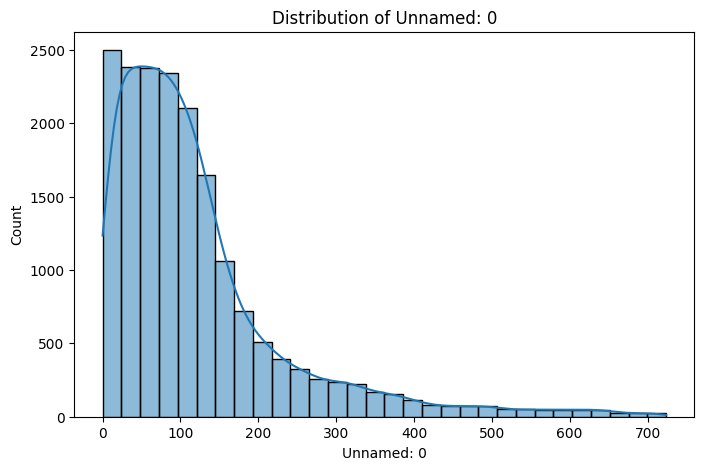

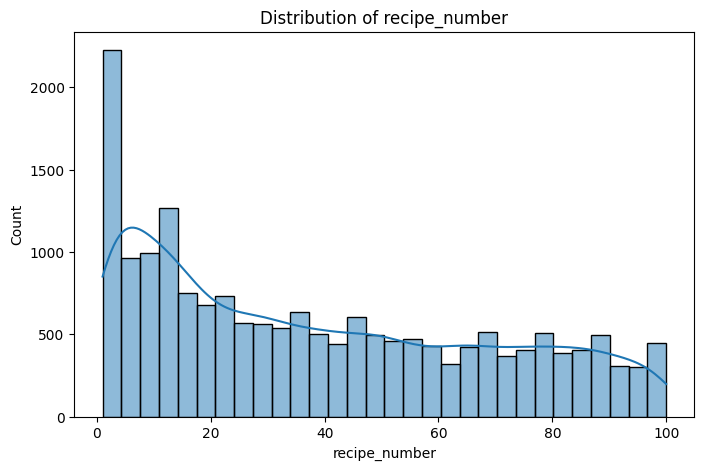

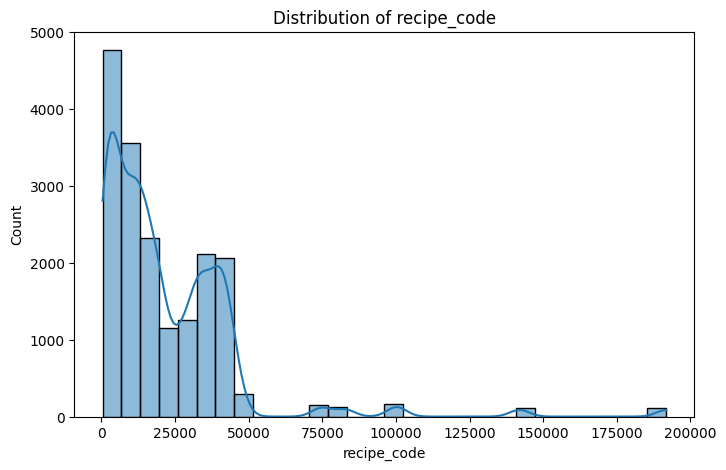

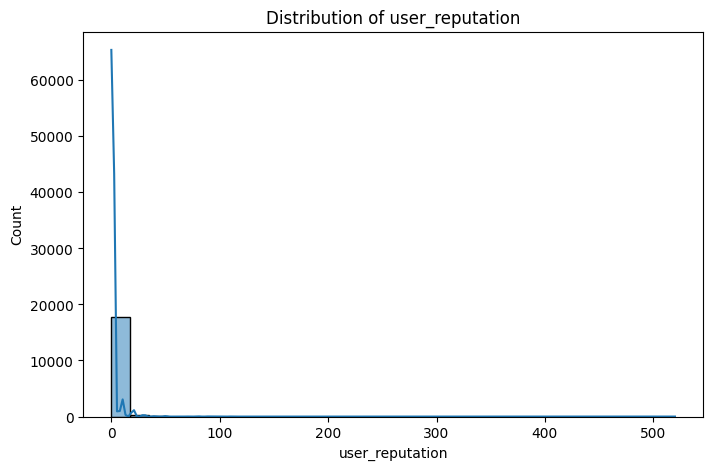

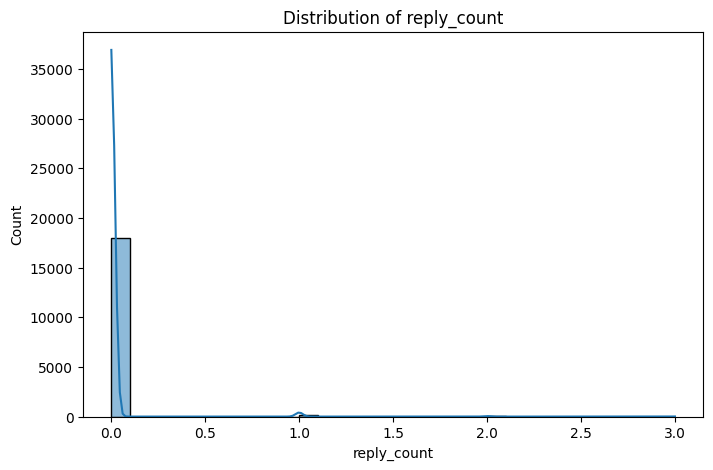

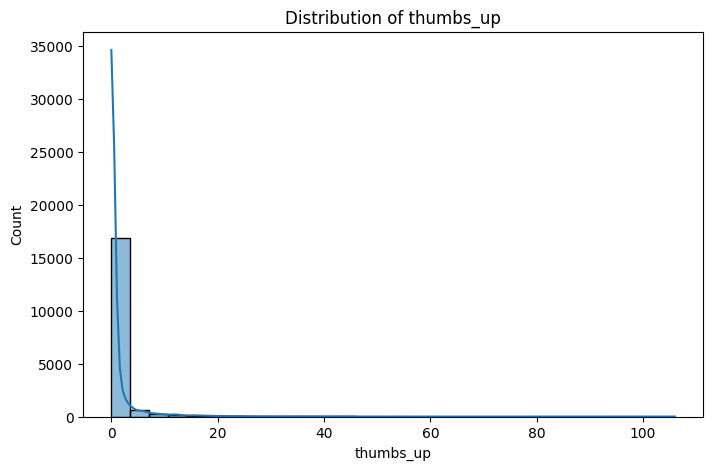

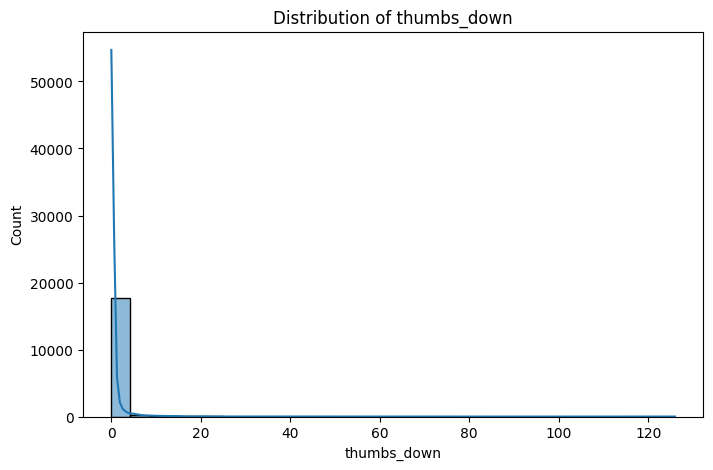

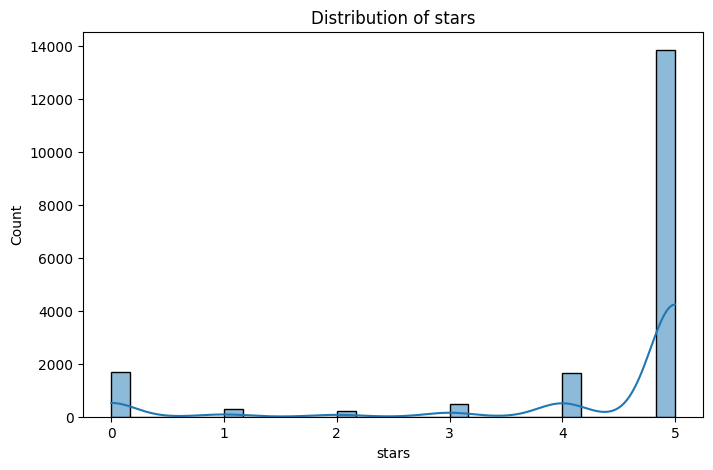

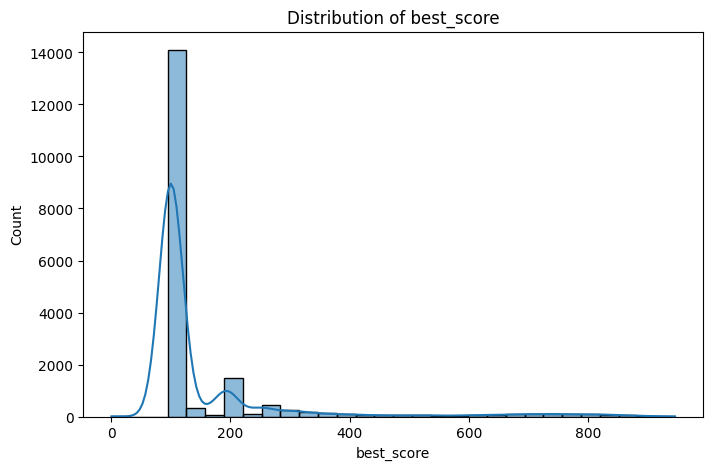

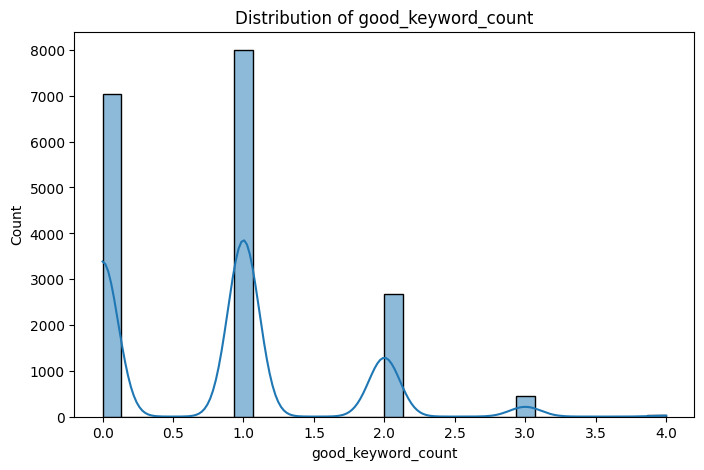

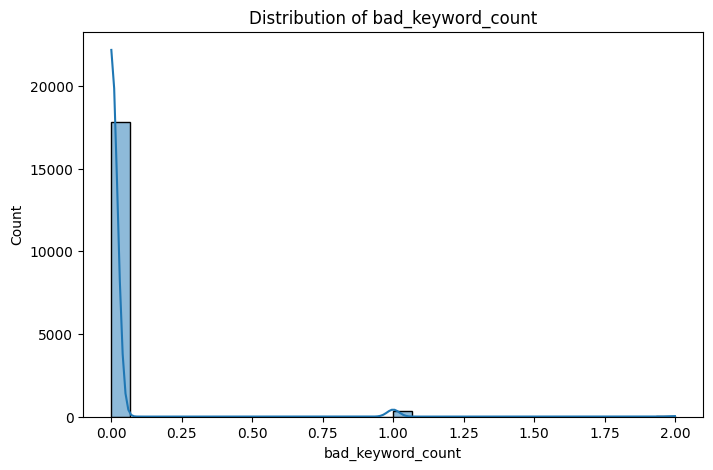

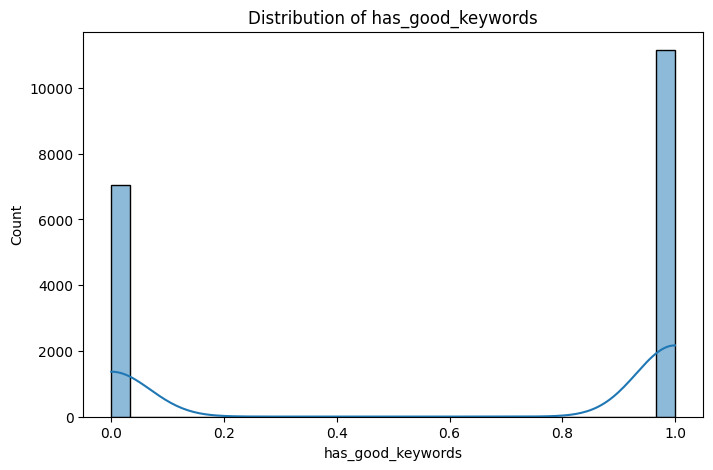

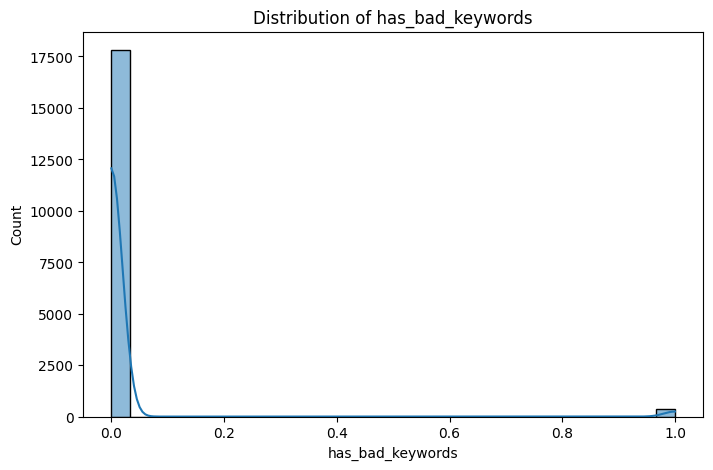

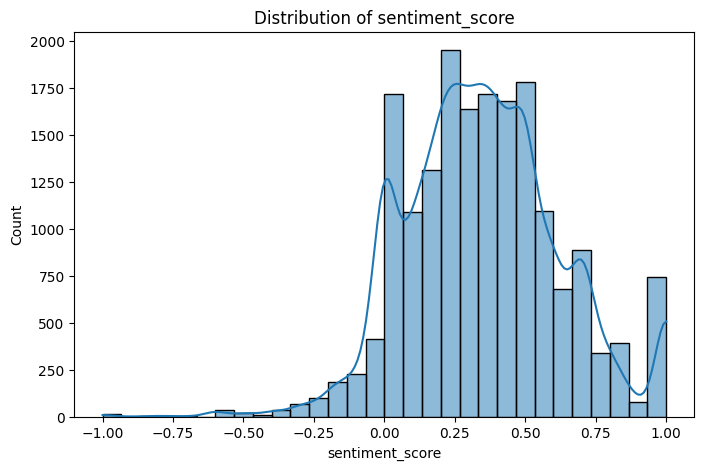

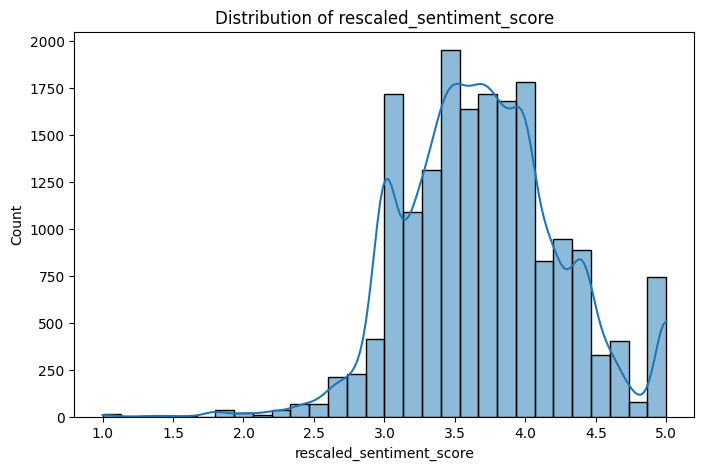

In [25]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()


Sentiment Analysis

                                                text  sentiment
0  I tweaked it a little, removed onions because ...   0.229762
1  Bush used to have a white chili bean and it ma...   0.083333
2  I have a very complicated white chicken chili ...   0.159091
3  In your introduction, you mentioned cream chee...   0.000000
4  Wonderful! I made this for a &#34;Chili/Stew&#...   0.233333


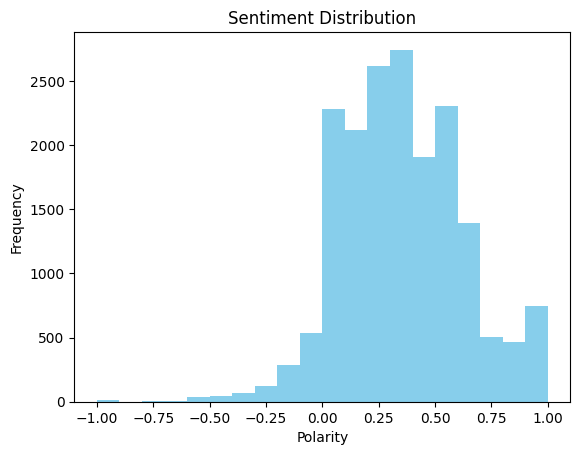

In [26]:
from textblob import TextBlob

# Calculate sentiment polarity
df['sentiment'] = df['processed_reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
print(df[['text', 'sentiment']].head())

# Visualize sentiment distribution
plt.hist(df['sentiment'], bins=20, color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()


Most comments or reviews in the dataset might lean toward neutral or positive sentiment (clustered between 0 and 0.5).
The lower frequency of negative scores suggests that negative sentiments are relatively rare in the data.


## Bivariate statistics

### Correlation Matrix

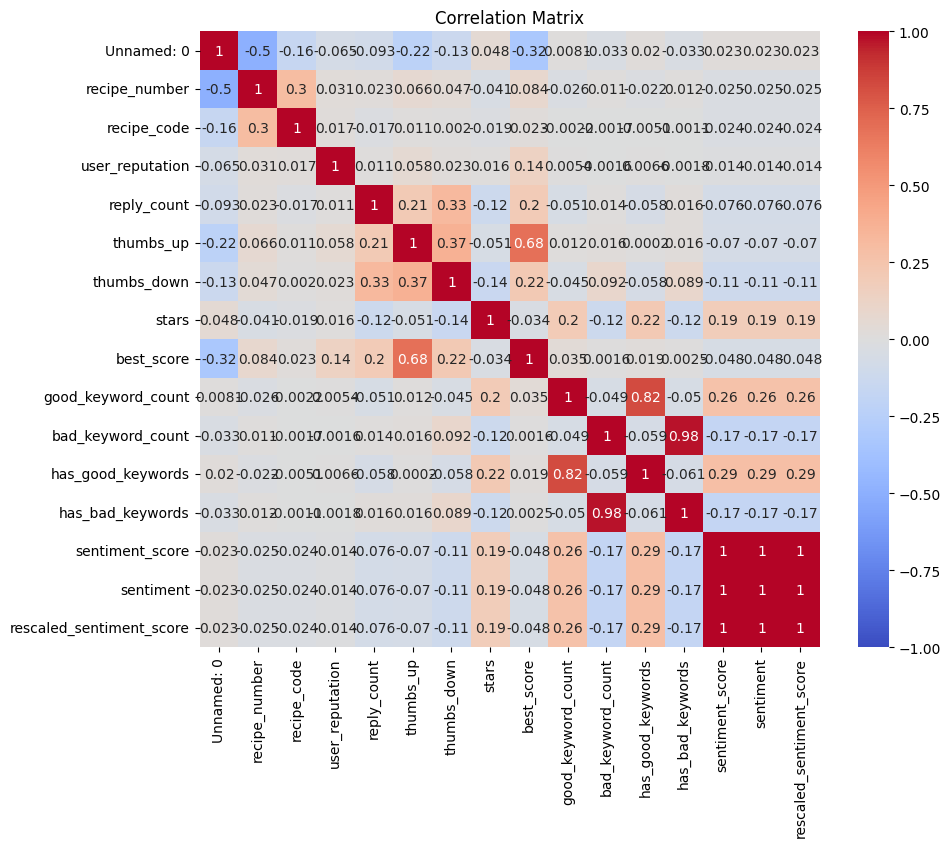

In [32]:
numeric_data = df.select_dtypes(include=['float64', 'int64']).columns

#Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_data].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

correlation_matrix = df[numeric_data].corr()


top correlations

Strong correlations (above threshold of 0.7):
Unnamed: 0          Unnamed: 0                  1.000000
good_keyword_count  has_good_keywords           0.823804
bad_keyword_count   has_bad_keywords            0.975084
sentiment_score     rescaled_sentiment_score    1.000000
dtype: float64


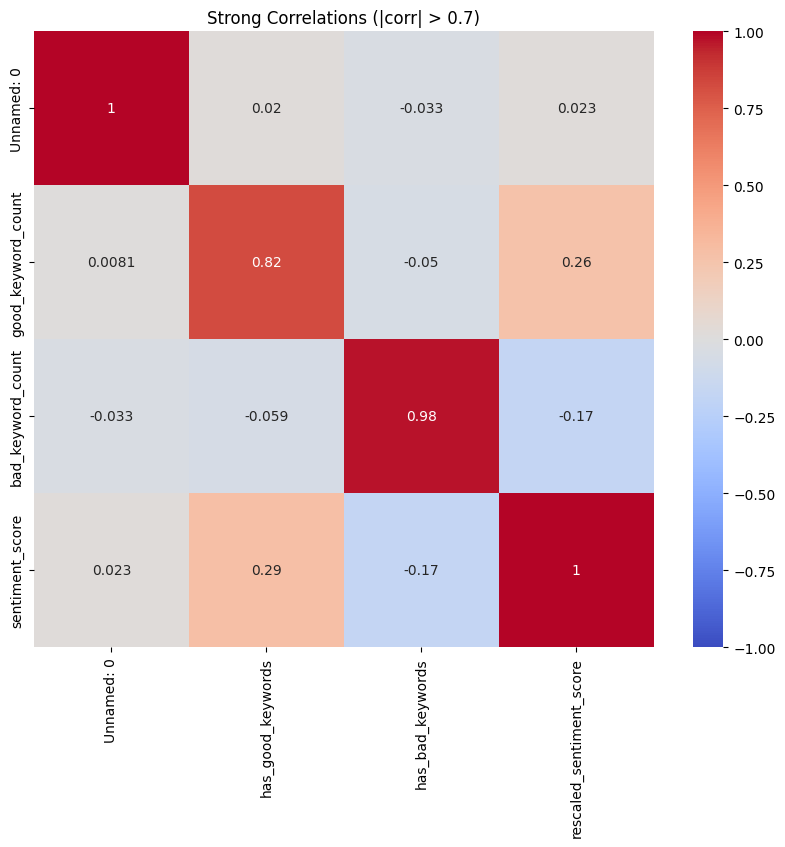

In [33]:
correlation_pairs = correlation_matrix.unstack()
threshold = 0.7

# Filter correlations that exceed the threshold
strong_correlations = correlation_pairs[correlation_pairs.abs() > threshold]

# Drop duplicates (each pair appears twice in the unstacked matrix)
strong_correlations = strong_correlations.drop_duplicates()

# Display strong correlations
print("Strong correlations (above threshold of 0.7):")
print(strong_correlations)

# Plot the filtered correlations
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix.loc[strong_correlations.index.get_level_values(0),
                           strong_correlations.index.get_level_values(1)],
    annot=True, cmap='coolwarm', vmin=-1, vmax=1
)
plt.title(f'Strong Correlations (|corr| > {threshold})')
plt.show()


# Machine Learning: Classification model - Logistic Regression


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.15      0.25       528
           1       0.87      0.99      0.93      3109

    accuracy                           0.87      3637
   macro avg       0.81      0.57      0.59      3637
weighted avg       0.86      0.87      0.83      3637

Accuracy Score: 0.8693978553753093


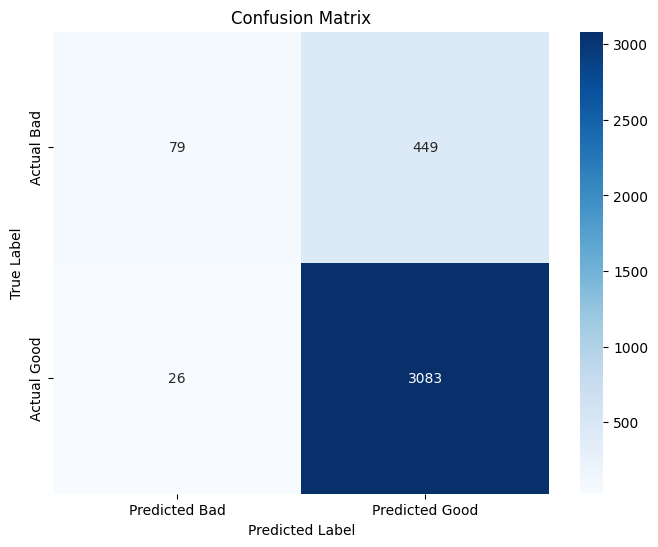

In [56]:

# Create binary target variable: 1 for "good recipes" (4 or 5 stars), 0 for "bad recipes" (1-3 stars)
df["good_recipe"] = df["stars"].apply(lambda x: 1 if x >= 4 else 0)

#Text vectorization using TF-IDF
tfidf = TfidfVectorizer(stop_words="english", max_features=5000)  # Limit features for performance
X_text = tfidf.fit_transform(df["text"])
X = X_text
y = df["good_recipe"]

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Bad", "Predicted Good"],
            yticklabels=["Actual Bad", "Actual Good"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



The model achieves strong overall accuracy (87%) but struggles with "bad recipes" (class 0), showing low recall (15%). It performs well in identifying "good recipes" (class 1) with high precision (87%) and recall (99%).

The confusion matrix reveals the model's strong performance in predicting "good recipes," with 3,083 true positives and only 26 false negatives. However, it struggles with "bad recipes," correctly identifying only 78 out of 528 while misclassifying 450 as good recipes. This highlights the class imbalance and the difficulty in detecting less frequent "bad recipes.

# Regression Model - Linear Regression

### Linear regression

In [58]:
X = df[['thumbs_up', 'thumbs_down', 'good_keyword_count', 'bad_keyword_count', 'sentiment_score', 'rescaled_sentiment_score']]
y = df['stars']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f"R-squared: {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

R-squared: 0.07879137324052476
Mean Squared Error: 2.1734354115906767


R2: only 7.88% of the variance in the stars (target variable) is explained by the features in the model, which is low. It suggests that the chosen features (reply_count, thumbs_up, thumbs_down, user_reputation, sentiment_score) are not strongly predictive of the recipe ratings. There may be missing key predictors or a non-linear relationship that the model cannot capture.

An MSE of 2.17 suggests that predictions deviate significantly from the actual ratings, which are on a 1-5 scale.

While it is hard to judge this value without a benchmark, the high MSE aligns with the low R-squared, indicating room for improvement in model performance.

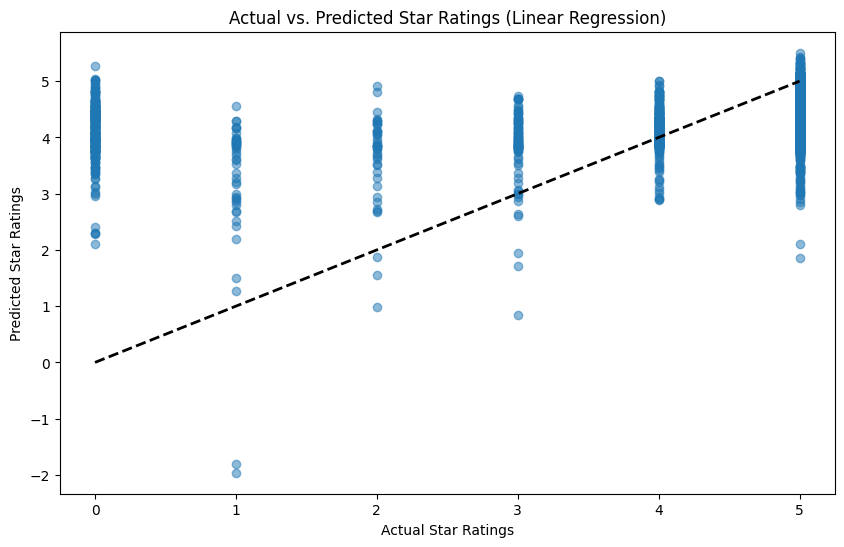

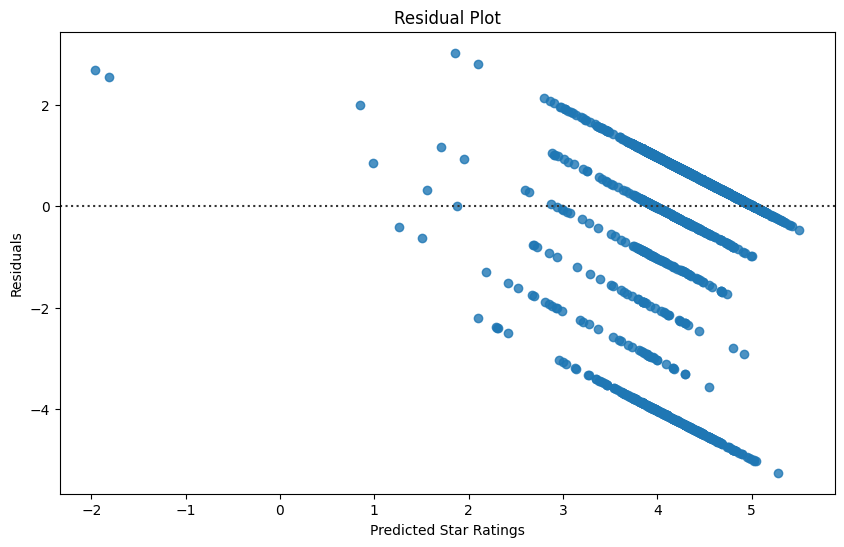

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Add a diagonal line for reference
plt.xlabel("Actual Star Ratings")
plt.ylabel("Predicted Star Ratings")
plt.title("Actual vs. Predicted Star Ratings (Linear Regression)")
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals)
plt.xlabel("Predicted Star Ratings")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

### random forest

In [43]:
vectorizer = TfidfVectorizer(max_features=500)  # Limit features if needed
df['text'] = df['text'].fillna('')
X = vectorizer.fit_transform(df['text'])
y = df['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10, n_jobs=-1)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R² Score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')


R² Score: 0.0675
Mean Squared Error: 2.2002


similar results, still bad.

# hyperparameter

Sadly after many attempts, I can't execute these commands, they take hours so I don't have the outputs.

hyperparameter tuning for regression

In [65]:
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model evaluation
best_rf = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

y_pred = best_rf.predict(X_test)
print("R-squared:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Fitting 3 folds for each of 108 candidates, totalling 324 fits


KeyboardInterrupt: 

hyperparameter tuning for classification

In [63]:
X = df['text']
y = df['stars']

vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE for oversampling the minority class (bad recipes)
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_rf_model = grid_search.best_estimator_
# Predict on the test set
y_pred = best_rf_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

In [66]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Bad Recipes", "Good Recipes"], yticklabels=["Bad Recipes", "Good Recipes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [67]:
# Examine feature importance (keywords contributing to classification)
feature_names = tfidf.get_feature_names_out()
coefficients = model.coef_[0]
top_positive = np.argsort(coefficients)[-10:]
top_negative = np.argsort(coefficients)[:10]

print("Top Positive Features (Good Recipes):")
for index in top_positive:
    print(f"{feature_names[index]}: {coefficients[index]}")

print("\nTop Negative Features (Bad Recipes):")
for index in top_negative:
    print(f"{feature_names[index]}: {coefficients[index]}")


Top Positive Features (Good Recipes):


IndexError: invalid index to scalar variable.